# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

#### 設定 模型 估計參數

In [2]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

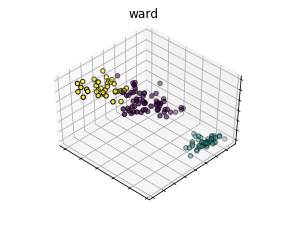

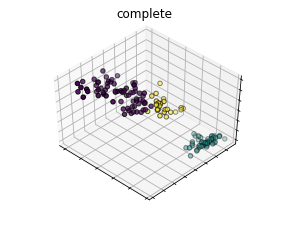

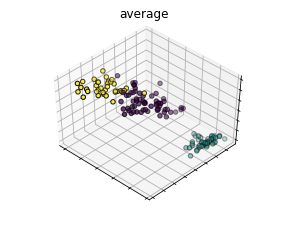

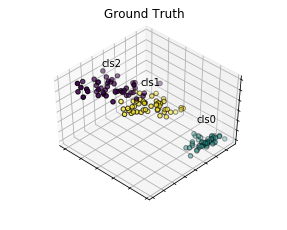

In [3]:
fignum = 1
titles = ['ward', 'complete', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

### 模型的樹狀圖 - 以complete為例

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

row_clusters = linkage(X, method='complete', metric='euclidean')

In [5]:
pd.DataFrame(row_clusters,
            columns=['row label 1',
                     'row label 2',
                    'distance',
                    'no. of items in cluster'],
            index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in cluster
cluster 1,101.0,142.0,0.000000,2.0
cluster 2,7.0,39.0,0.100000,2.0
cluster 3,0.0,17.0,0.100000,2.0
cluster 4,9.0,34.0,0.100000,2.0
cluster 5,128.0,132.0,0.100000,2.0
cluster 6,10.0,48.0,0.100000,2.0
cluster 7,4.0,37.0,0.141421,2.0
cluster 8,19.0,21.0,0.141421,2.0
cluster 9,29.0,30.0,0.141421,2.0
cluster 10,57.0,93.0,0.141421,2.0


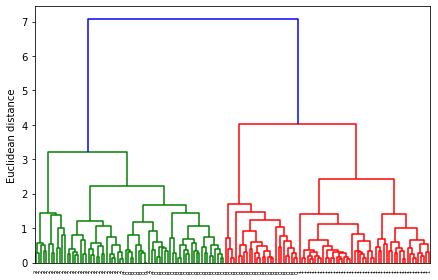

In [6]:
row_dendro = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()